In [33]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
colors = ['#651FFF', '#00B0FF', '#1DE9B6', '#00E676', '#FF9100', '#FF3D00']
sns.set_palette(colors)
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
results = pd.read_csv('2014_results.csv')

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [3]:
results = results.drop(['ctz'], axis=1)

In [4]:
results['state'] = results['state'].fillna(value='inter')

In [5]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,inter,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,inter,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,inter,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,inter,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,inter,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 20 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        31984 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 4.9+ MB


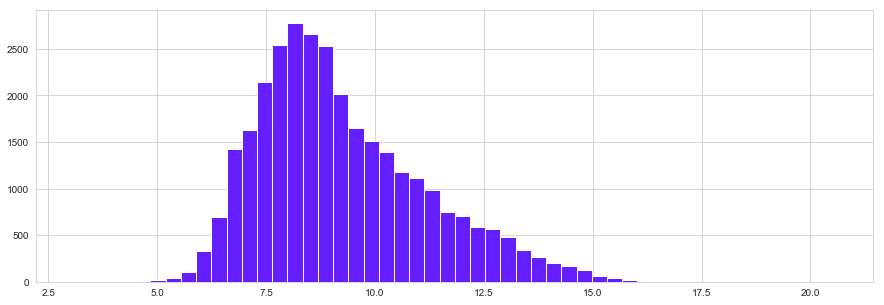

In [34]:
plt.hist(results['pace'], bins=50)
plt.show()

In [8]:
to_number = ['5k','10k','20k', '25k', 'half', '30k','35k', '40k']

def to_numeric(columns):
    for column in columns:
        results[column] = pd.to_numeric(results[column], errors='coerce')
        
to_numeric(to_number)

In [9]:
results.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

### Get the Countries
Pulled countries, their regions and their respective codes from https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv. Will merge this with the results table.

In [10]:
results.country.value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       89
BRA       87
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
CHI       29
ISL       28
FIN       28
BEL       27
SIN       23
AUT       22
NOR       21
RSA       19
VEN       19
RUS       18
       ...  
LUX        4
SVK        4
CZE        4
TUR        4
ECU        3
UKR        3
DOM        3
HUN        3
PAN        3
BAH        2
THA        2
QAT        2
ROU        2
ESA        2
EGY        2
INA        1
CAY        1
URU        1
BAR        1
BLR        1
TRI        1
CRO        1
EST        1
VGB        1
MAR        1
BOL        1
ZIM        1
TAN        1
LIE        1
BRN        1
Name: country, Length: 78, dtype: int64

In [11]:
countries = pd.read_csv('countries.csv')

merge = ['alpha-3', 'country-code', 'region', 'sub-region', 'region-code', 'sub-region-code'] 

countries.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [12]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
name                        249 non-null object
alpha-2                     248 non-null object
alpha-3                     249 non-null object
country-code                249 non-null int64
iso_3166-2                  249 non-null object
region                      248 non-null object
sub-region                  248 non-null object
intermediate-region         107 non-null object
region-code                 248 non-null float64
sub-region-code             248 non-null float64
intermediate-region-code    107 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB


In [13]:
country_m = countries[merge]
country_m = country_m.rename({'alpha-3':'country'}, axis='columns')

results = results.merge(country_m, on='country')

results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,half,20k,country,city,40k,country-code,region,sub-region,region-code,sub-region-code
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,39.72,37.65,JPN,Fukuoka,80.43,392,Asia,Eastern Asia,142.0,30.0
1,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,38.60,36.58,JPN,Nogata Fukuoka,76.72,392,Asia,Eastern Asia,142.0,30.0
2,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,...,38.60,36.60,JPN,Isahaya,76.70,392,Asia,Eastern Asia,142.0,30.0
3,35.20,"Higuchi, Noriko",21,88.73,F,28,153.65,F22,21,126.48,...,74.73,70.80,JPN,Kyoto,145.47,392,Asia,Eastern Asia,142.0,30.0
4,30.83,"Sakai, Koichi",14,78.02,M,28,134.93,26,14,111.12,...,65.70,62.30,JPN,Chiba,127.67,392,Asia,Eastern Asia,142.0,30.0


In [14]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31435 entries, 0 to 31434
Data columns (total 25 columns):
10k                31386 non-null float64
name               31435 non-null object
division           31435 non-null int64
25k                31221 non-null float64
gender             31435 non-null object
age                31435 non-null int64
official           31435 non-null float64
bib                31435 non-null object
genderdiv          31435 non-null int64
35k                31402 non-null float64
overall            31435 non-null int64
pace               31435 non-null float64
state              31435 non-null object
30k                31396 non-null float64
5k                 31383 non-null float64
half               31364 non-null float64
20k                31384 non-null float64
country            31435 non-null object
city               31434 non-null object
40k                31397 non-null float64
country-code       31435 non-null int64
region             31435 

In [15]:
results['sub-region'].value_counts()

Northern America                   29408
Northern Europe                      609
Latin America and the Caribbean      384
Eastern Asia                         330
Southern Europe                      301
Western Europe                       169
Australia and New Zealand            141
Eastern Europe                        50
Sub-Saharan Africa                    18
Western Asia                          13
Southern Asia                          6
Northern Africa                        3
South-eastern Asia                     3
Name: sub-region, dtype: int64

In [16]:
results['city'].value_counts()

Boston                            1034
New York                           498
Chicago                            313
Cambridge                          311
Toronto                            240
Somerville                         240
Brookline                          222
Washington                         212
Newton                             201
San Francisco                      192
Austin                             192
Portland                           191
Arlington                          184
San Diego                          182
Brighton                           151
Seattle                            149
Charlestown                        148
Houston                            138
London                             135
Quincy                             134
Medford                            132
Brooklyn                           131
South Boston                       130
Ottawa                             130
Atlanta                            122
Denver                   

___

#### Gender to Codes

In [17]:
results.gender.value_counts()

M    17191
F    14244
Name: gender, dtype: int64

In [18]:
results['gender'] = results['gender'].astype('category')

results['gender_code'] = results['gender'].cat.codes

___

In [19]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,20k,country,city,40k,country-code,region,sub-region,region-code,sub-region-code,gender_code
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,37.65,JPN,Fukuoka,80.43,392,Asia,Eastern Asia,142.0,30.0,1
1,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,36.58,JPN,Nogata Fukuoka,76.72,392,Asia,Eastern Asia,142.0,30.0,1
2,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,...,36.60,JPN,Isahaya,76.70,392,Asia,Eastern Asia,142.0,30.0,1
3,35.20,"Higuchi, Noriko",21,88.73,F,28,153.65,F22,21,126.48,...,70.80,JPN,Kyoto,145.47,392,Asia,Eastern Asia,142.0,30.0,0
4,30.83,"Sakai, Koichi",14,78.02,M,28,134.93,26,14,111.12,...,62.30,JPN,Chiba,127.67,392,Asia,Eastern Asia,142.0,30.0,1


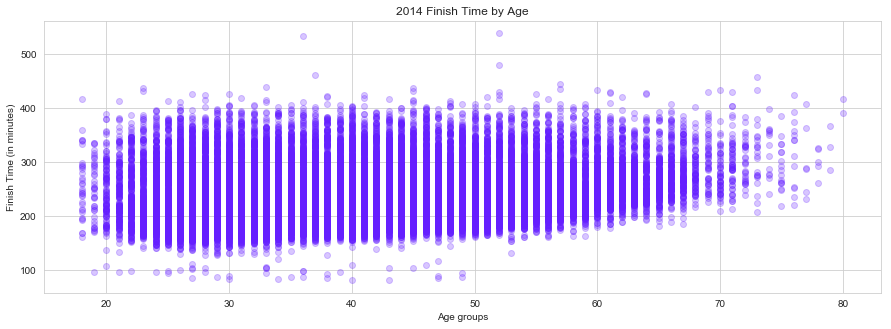

In [47]:
plt.scatter(x = results['age'], y = results['official'], alpha=.25)
plt.title('2014 Finish Time by Age') 
plt.xlabel('Age groups')
plt.ylabel('Finish Time (in minutes)');

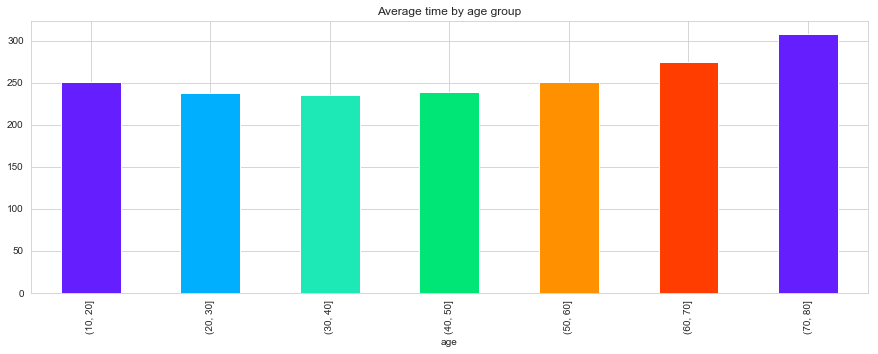

In [35]:
results['official'].groupby(pd.cut(results['age'], range(10,90,10))).aggregate(np.average).plot(kind="bar", title="Average time by age group")
plt.show()

In [22]:
results.age.max()

81

In [23]:
results['age-bracket'] = pd.cut(results['age'], range(10,90,10))
results['age-bracket'] = results['age-bracket'].astype('category')
results['age-bracket_code'] = results['age-bracket'].cat.codes

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


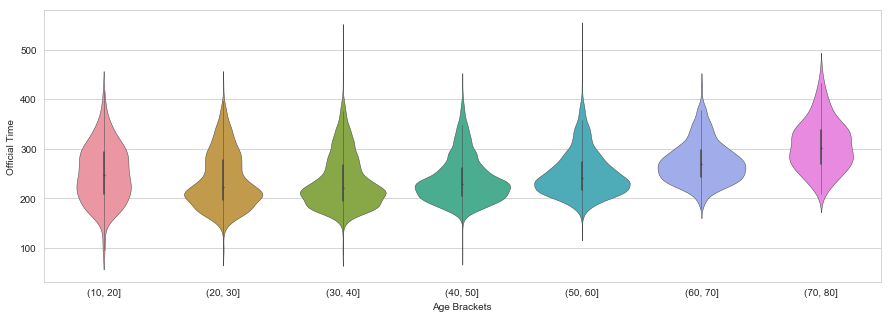

In [36]:
sns.violinplot(x='age-bracket', y='official', data=results, linewidth=.5)
plt.xlabel('Age Brackets')
plt.ylabel('Official Time')
plt.show()

___

In [37]:
results.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,city,40k,country-code,region,sub-region,region-code,sub-region-code,gender_code,age-bracket,age-bracket_code
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,Fukuoka,80.43,392,Asia,Eastern Asia,142.0,30.0,1,"(40, 50]",3
1,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,Nogata Fukuoka,76.72,392,Asia,Eastern Asia,142.0,30.0,1,"(30, 40]",2
2,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,67.83,...,Isahaya,76.70,392,Asia,Eastern Asia,142.0,30.0,1,"(40, 50]",3
3,35.20,"Higuchi, Noriko",21,88.73,F,28,153.65,F22,21,126.48,...,Kyoto,145.47,392,Asia,Eastern Asia,142.0,30.0,0,"(20, 30]",1
4,30.83,"Sakai, Koichi",14,78.02,M,28,134.93,26,14,111.12,...,Chiba,127.67,392,Asia,Eastern Asia,142.0,30.0,1,"(20, 30]",1


In [38]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31099 entries, 0 to 31434
Data columns (total 28 columns):
10k                 31099 non-null float64
name                31099 non-null object
division            31099 non-null int64
25k                 31099 non-null float64
gender              31099 non-null category
age                 31099 non-null int64
official            31099 non-null float64
bib                 31099 non-null object
genderdiv           31099 non-null int64
35k                 31099 non-null float64
overall             31099 non-null int64
pace                31099 non-null float64
state               31099 non-null object
30k                 31099 non-null float64
5k                  31099 non-null float64
half                31099 non-null float64
20k                 31099 non-null float64
country             31099 non-null object
city                31099 non-null object
40k                 31099 non-null float64
country-code        31099 non-null int64
re

In [39]:
results['state'].value_counts()

MA       7425
CA       2300
inter    2001
NY       1537
ON       1045
PA        997
TX        987
IL        911
OH        754
FL        745
VA        709
MI        689
NC        617
WA        595
CO        576
NJ        564
MN        554
MD        522
NH        521
CT        520
GA        441
WI        429
UT        429
QC        418
OR        405
AZ        316
IN        290
TN        255
MO        253
ME        249
         ... 
ID        123
NE        110
NS        108
AL        104
OK         92
NV         87
LA         77
NM         71
MT         65
DE         63
WV         56
NB         55
AK         49
AR         48
HI         48
MB         47
MS         44
SD         32
SK         32
ND         31
PE         23
WY         22
NL         17
PR         17
AE          7
YT          5
NT          3
AA          1
GU          1
AP          1
Name: state, Length: 69, dtype: int64

----

## Modeling

In [40]:
results._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31099 entries, 0 to 31434
Data columns (total 19 columns):
10k                 31099 non-null float64
division            31099 non-null int64
25k                 31099 non-null float64
age                 31099 non-null int64
official            31099 non-null float64
genderdiv           31099 non-null int64
35k                 31099 non-null float64
overall             31099 non-null int64
pace                31099 non-null float64
30k                 31099 non-null float64
5k                  31099 non-null float64
half                31099 non-null float64
20k                 31099 non-null float64
40k                 31099 non-null float64
country-code        31099 non-null int64
region-code         31099 non-null float64
sub-region-code     31099 non-null float64
gender_code         31099 non-null int8
age-bracket_code    31099 non-null int8
dtypes: float64(12), int64(5), int8(2)
memory usage: 5.6 MB


In [77]:
# Make sure the number of rows divides evenly into four samples.
#rows = df.shape[0] - df.shape[0] % 4
#resu = df.iloc[:rows, :]

results = results.dropna()

res_num = results._get_numeric_data()

# Break into a set of features and a variable for the known outcome.
X = res_num.drop('gender_code', axis=1)
y = res_num['gender_code']

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

from sklearn.model_selection import train_test_split

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [78]:
X_train.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,country-code,region-code,sub-region-code,age-bracket_code
1962,37.62,47,93.68,41,163.73,476,133.65,508,6.25,113.30,19.02,79.07,74.98,154.15,840,19.0,21.0,3
21072,62.13,2088,162.95,41,321.22,12755,251.65,28952,12.27,206.57,30.92,133.57,126.27,300.32,840,19.0,21.0,3
25000,53.77,4054,138.83,36,245.03,7525,201.47,19118,9.35,170.03,26.83,115.63,109.42,232.05,840,19.0,21.0,2
10299,49.63,1215,124.65,53,221.50,8941,178.55,12872,8.45,150.48,24.90,105.02,99.62,208.95,840,19.0,21.0,4
13095,47.22,831,124.58,55,231.88,10184,185.95,15812,8.85,154.60,23.12,103.53,97.83,216.98,840,19.0,21.0,4


In [79]:
# Calculate predicted values.
km = KMeans(n_clusters=2).fit(X_train)
y_train_pred = km.predict(X_train)

# Check the solution against the data.
print('\nComparing k-means clusters against the training set data:')
print(pd.crosstab(y_train, y_train_pred))


Comparing k-means clusters against the training set data:
col_0           0     1
gender_code            
0            3945  3133
1            3651  4820


In [80]:
from sklearn import metrics
n_clusters = (2,4,6,10,20,30,50,75,100)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    model = KMeans(n_clusters=n, random_state=None).fit(X_train)
    labels = model.labels_
    print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

Number of estimated clusters: 2
0.5739650001334011
Number of estimated clusters: 4
0.43978144924077156
Number of estimated clusters: 6
0.3544227194013345
Number of estimated clusters: 10
0.3957858709736754
Number of estimated clusters: 20
0.4163987907379168
Number of estimated clusters: 30
0.4261477049653871
Number of estimated clusters: 50
0.43021533031097803
Number of estimated clusters: 75
0.428588238869261
Number of estimated clusters: 100
0.4203809099976553


In [81]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  y_train_pred))

ARI for  Training set data: 
0.016164801818414634


## Mean Shift

In [83]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
print("bandwidth: {}".format(bandwidth))

model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X_train)

labels = model.labels_
cluster_centers = model.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

bandwidth: 5312.807356059047
Number of estimated clusters: 3
0.4948201422208656


In [84]:
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Comparing the assigned categories to the ones in the data:
col_0           0     1     2
gender_code                  
0            1638  2919  2521
1            3681  2177  2613


In [85]:
# Adjusted Rand Score
metrics.adjusted_rand_score(y_train, labels)

0.03362704354826214

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

# We know we're looking for two clusters.
n_clusters=2

start_time = time.clock()
# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
train_predict=sc.fit_predict(X_train)



print('Runtime for Spectral Cluster: '+'%s seconds'% (time.clock() - start_time))

print('\nComparing the assigned categories to the ones in the Training set data:')
print(pd.crosstab(y_train,train_predict))

This was taking forever to run, so skipping for now.

### Affinnity Propagaton

In [89]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation(damping=.75, affinity='euclidean').fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

start_time = time.clock()
#Predicted clusters.
predict=af.fit_predict(X_train)

print('Runtime for Affinity propagation: '+'%s seconds'% (time.clock() - start_time))

print('Estimated number of clusters: {}'.format(n_clusters_))

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Done


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Runtime for Affinity propagation: 886.0945329999959 seconds
Estimated number of clusters: 565
Comparing the assigned categories to the ones in the data:
col_0        0    1    2    3    4    5    6    7    8    9   ...   555  556  \
gender_code                                                   ...              
0              1    1    1    1    1    1    1    2    0    1 ...     1    0   
1              0    0    0    0    0    0    0    0  108    0 ...     0  109   

col_0        557  558  559  560  561  562  563  564  
gender_code                                          
0              1    1    1    0    1    1    1    1  
1              0    0    0  147    0    0    0    0  

[2 rows x 565 columns]


Very very random and doesn't tell us much at all

In [91]:
from sklearn.metrics import pairwise_distances

print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

0.3818095410380991


In [90]:
print('ARI for  Training set data: ')
print(metrics.adjusted_rand_score(y_train,  predict))

ARI for  Training set data: 
0.023421073207129443
